In [24]:
import collections
import sys
import subprocess
import pandas as pd
import seaborn as sns
import os
import numpy as np
import uuid
import tempfile
import bnpy
import scikit_posthocs as sp
import itertools

from scipy.stats import kruskal, f_oneway
from scipy.stats import ttest_ind

sys.path.append('/opt/hydra/')

src = os.environ["HYDRA_SRC"]

import library.analysis as hy

import logging 

In [25]:
# This cmd was used to identify multimodal genes 
cmd = ["docker" ,
       "run",
       "-v", "$PWD:/data",
       "jpfeil/hydra@sha256:930436b5df08d88f2ba68483e0234dfb4ba639f40d6a725eb497422ffefb71de",
       "filter",
       "-e", "data/TARGET-osteo-minus-muscle.tsv",
       "--output-dir", "output",
       "--CPU", "15",
       "--min-mean-filter", "1.0"]

In [26]:
mm_genes = 'output/MultiModalGenes/'
exp_path = 'data/TARGET-osteo-minus-muscle.tsv'

In [27]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

In [28]:
exp.shape

(15196, 60)

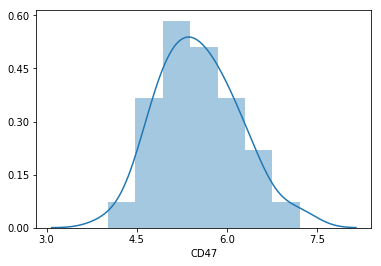

In [29]:
sns.distplot(exp.loc['CD47', :])

In [41]:
logging.basicConfig()
root = logging.getLogger()
root.setLevel(logging.DEBUG)
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)

res = hy.EnrichmentAnalysis(exp_path=exp_path,
                            mm_path=mm_genes,
                            min_comp_filter=0.15,
                            min_effect_filter=1.0,
                            gmt_path='data/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_entrezgene.gmt')

INFO:root:Startng hydra enrichment clustering analysis
DEBUG:root:Background: 15196
DEBUG:root:Minimum Component Probability Filter: AC011558.5
DEBUG:root:Minimum Component Probability Filter: HOXB7
DEBUG:root:Minimum Component Probability Filter: AC137934.1
DEBUG:root:Minimum Component Probability Filter: CDKN2A
DEBUG:root:Minimum Component Probability Filter: RP11-214O1.2
DEBUG:root:Minimum Component Probability Filter: PVT1_1
DEBUG:root:Minimum Component Probability Filter: CPAMD8
DEBUG:root:Minimum Component Probability Filter: NEK11
DEBUG:root:Minimum Component Probability Filter: MAMSTR
DEBUG:root:Minimum Component Probability Filter: SP7
DEBUG:root:Minimum Component Probability Filter: SYNJ2
DEBUG:root:Minimum Component Probability Filter: GAGE12B
DEBUG:root:Minimum Component Probability Filter: RP11-178C3.2
DEBUG:root:Minimum Component Probability Filter: RP11-467L13.5
DEBUG:root:Minimum Component Probability Filter: PKNOX1
DEBUG:root:Minimum Component Probability Filter: CAPS


DEBUG:root:Minimum Component Probability Filter: AC137695.1
DEBUG:root:Minimum Component Probability Filter: USP2
DEBUG:root:Minimum Component Probability Filter: LINC00893
DEBUG:root:Minimum Component Probability Filter: CKMT2
DEBUG:root:Minimum Component Probability Filter: LRRC39
DEBUG:root:Minimum Component Probability Filter: SNURF
DEBUG:root:Minimum Component Probability Filter: FAM83G
DEBUG:root:Minimum Component Probability Filter: RNY4
DEBUG:root:Minimum Component Probability Filter: EGLN2
DEBUG:root:Minimum Component Probability Filter: MAP3K8
DEBUG:root:Minimum Component Probability Filter: CTC-448F2.6
DEBUG:root:Minimum Component Probability Filter: GPC3
DEBUG:root:Minimum Component Probability Filter: CTC-459F4.1
DEBUG:root:Minimum Component Probability Filter: GTSF1
DEBUG:root:Minimum Component Probability Filter: METTL22
DEBUG:root:Minimum Component Probability Filter: RP11-455F5.3
DEBUG:root:Minimum Component Probability Filter: PCSK1N
DEBUG:root:Minimum Component Proba

In [45]:
res.get_enriched_terms()

,Unnamed: 0,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
0,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,17/182,146/10841,3.187236e-10,7.690800e-07,7.102503e-07,CXCL11/IL11/CCL21/CHRDL2/CXCL13/PRL/CXCL9/CXCL...,17
1,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,25/182,358/10841,1.304826e-09,1.574273e-06,1.453851e-06,CXCL11/IL11/CCL21/CHRDL2/CXCL13/PRL/CST6/HMSD/...,25
2,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,10/182,59/10841,4.280935e-08,3.443299e-05,3.179908e-05,NMU/CXCL11/CCL21/CXCL13/CXCL9/CXCL8/PENK/TAC3/...,10
3,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,11/182,100/10841,8.543338e-07,4.590966e-04,4.239786e-04,NMU/CXCL11/CCL21/CXCL13/TSHR/CXCL9/CXCL8/PENK/...,11
4,CELL-CELL SIGNALING%GOBP%GO:0007267,CELL-CELL SIGNALING%GOBP%GO:0007267,CELL-CELL SIGNALING%GOBP%GO:0007267,22/182,401/10841,9.512983e-07,4.590966e-04,4.239786e-04,SCN4B/CXCL11/SNAP25/CCL21/APBA2/C15orf59/CHRNE...,22
5,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,15/182,203/10841,1.569063e-06,6.310248e-04,5.827555e-04,SCN4B/NMU/KCNH2/HAND2/ATP1B2/HRC/SLN/CACNA1G/D...,15
6,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,12/182,145/10841,5.651570e-06,1.948177e-03,1.799154e-03,NMU/CXCL11/CCL21/CXCL13/TSHR/CXCL9/CXCL8/IHH/P...,12
7,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,6/182,31/10841,1.070711e-05,3.229531e-03,2.982493e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/TFF2,6
8,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,5/182,20/10841,1.594820e-05,4.275888e-03,3.948810e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8,5
9,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,5/182,21/10841,2.064846e-05,4.982474e-03,4.601347e-03,CXCL11/CXCL13/CXCL9/CXCL8/GNLY,5


In [46]:
genes = res.get_enriched_term_genes()

len(genes)

65

In [47]:
clus = hy.MultivariateMixtureModel(data=exp.reindex(genes),
                                   center=True,
                                   gamma=5.0,
                                   variance=2.0,
                                   K=25, 
                                   verbose=True)

centering data
Dataset Summary:
X Data
  total size: 60 units
  batch size: 60 units
  num. batches: 1
Allocation Model:  DP mixture with K=0. Concentration gamma0= 5.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on mean and covar of each cluster
  E[  mean[k] ] = 
   [0. 0.]  ...
  E[ covar[k] ] = 
  [[2. 0.]
   [0. 2.]] ...
Initialization:
  initname = randexamplesbydist
  K = 25 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/MultivariateAnalysis_vc4xAn/K=25-gamma=5.0-ECovMat=2.0-moves=birth,merge,delete,shuffle/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
DELETE @ lap 1.00: Disabled. Cannot delete before first complete lap, because SS that represents whole dataset is required.
BIRTH @ lap 1.00 : Added 0 states. 0/17 succeeded. 0/17 failed eval phase. 17/17 failed build 

MERGE @ lap 30.00: No promising candidates, so no attempts.
BIRTH @ lap 30.000 : None attempted. 0 past failures. 0 too small. 3 too busy.
DELETE @ lap 30.00: 0/1 accepted. Ndiff 0.00.
   30.000/1000 after      8 sec. |    256.6 MiB | K    3 | loss  2.132285738e+00 | Ndiff    0.000 
MERGE @ lap 31.00: No promising candidates, so no attempts.
BIRTH @ lap 31.000 : None attempted. 0 past failures. 0 too small. 3 too busy.
DELETE @ lap 31.00: 0/1 accepted. Ndiff 0.00.
   31.000/1000 after      8 sec. |    256.6 MiB | K    3 | loss  2.132285738e+00 | Ndiff    0.000 
MERGE @ lap 32.00: No promising candidates, so no attempts.
DELETE @ lap 32.00: Empty plan. 0 UIDs eligible as delete target. 0 too busy with other moves. 0 too big. 3 have past failures.
BIRTH @ lap 32.000 : None attempted. 3 past failures. 0 too small. 0 too busy.
   32.000/1000 after      8 sec. |    256.6 MiB | K    3 | loss  2.132285738e+00 | Ndiff    0.000 
MERGE @ lap 33.00: No promising candidates, so no attempts.
DELETE

In [53]:
exp.reindex(genes).to_csv('model/training-data.tsv', sep='\t')

In [52]:
bnpy.ioutil.ModelWriter.save_model(clus.hmodel,
                                   'model',
                                   prefix='OsteoNoMuscle')

In [48]:
assignments = clus.get_assignments(exp.reindex(genes))

assign = pd.DataFrame(index=exp.columns,
                      columns=[1])

for sample, assignment in zip(exp.columns, assignments):
    assign.loc[sample, 1] = assignment + 1

In [49]:
hclust = hy.HClust(data=exp.reindex(genes))

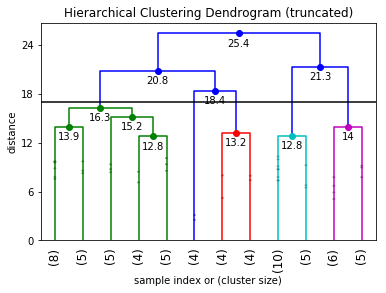

In [50]:
hclust.plot_row_linkage(17)
row_groups = hclust.get_row_groups(17)

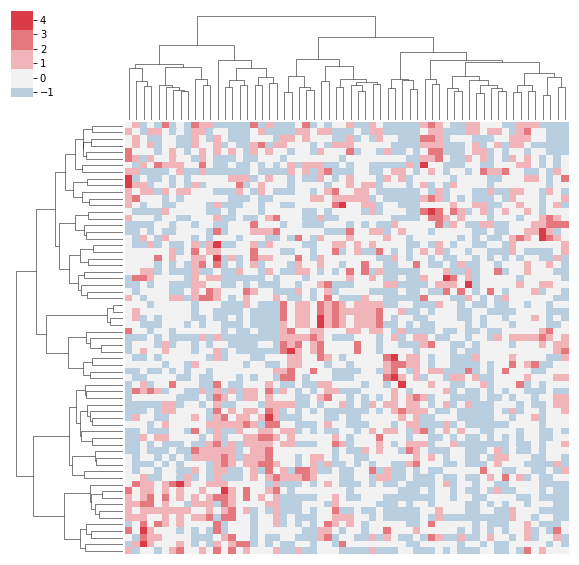

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

#col_order = assign.sort_values(1).index.values

g = sns.clustermap(exp.reindex(genes).dropna(),
                   z_score=0,
                   method='ward',
                   center=0,
                   cmap=sns.diverging_palette(240, 10, n=7),
                   figsize=(10, 10))

ax = g.ax_heatmap

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

pth = 'img/expression-heatmap.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

In [15]:
fgseas = {}
for cluster, rows in assign.groupby(1):
    ins = rows.index.values
    outs = [x for x in exp.columns if x not in ins]
    
    r = ttest_ind(exp[ins].values,
                  exp[outs].values,
                  axis=1).statistic
                    
    tstats = pd.DataFrame(index=exp.index, 
                          data=r).dropna()
                          
    tstats = tstats.sort_values(0, ascending=False)
    
    fgseas[cluster] = hy.n1(tstats)

In [23]:
t = fgseas[1]

t[(t['padj'] < 0.05) & (t['ES'] > 0)].sort_values('NES', ascending=False)

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
HALLMARK_INTERFERON_ALPHA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_ALPHA_RESPONSE,0.000089,0.005646,0.698468,4.093448,0,96,PSMB9|GBP4|IFI27|CASP1|PSMB8|CXCL11|IFI35|BATF...
HALLMARK_INTERFERON_GAMMA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_GAMMA_RESPONSE,0.000082,0.005646,0.611510,4.037416,0,185,IL18BP|PSMB9|GBP4|IFI27|CASP1|PSMB8|CXCL11|VAM...
RESPONSE TO INTERFERON-GAMMA%GOBP%GO:0034341,0.000088,0.005646,0.672804,4.002637,0,103,CCL18|GBP4|LGALS9|CASP1|CCL8|CCL5|IL12RB1|FCGR...
CELLULAR RESPONSE TO INTERFERON-GAMMA%GOBP%GO:0071346,0.000090,0.005646,0.666588,3.865003,0,91,CCL18|GBP4|LGALS9|CASP1|CCL8|CCL5|IL12RB1|FCGR...
INTERFERON-GAMMA-MEDIATED SIGNALING PATHWAY%GOBP%GO:0060333,0.000095,0.005646,0.723938,3.799797,0,59,FCGR1A|PTAFR|HLA-B|HLA-F|HLA-A|IFI30|HLA-DRA|B...
IMMUNOREGULATORY INTERACTIONS BETWEEN A LYMPHOID AND A NON-LYMPHOID CELL%REACTOME DATABASE ID RELEASE 66%198933,0.000094,0.005646,0.702393,3.775608,0,65,LILRB2|LILRB5|CD3E|FCGR3A|PILRA|CD3D|SIGLEC1|I...
INTERFERON GAMMA SIGNALING%REACTOME%R-HSA-877300.1,0.000093,0.005646,0.675785,3.733597,0,73,GBP4|FCGR1A|PTPN6|PTAFR|HLA-B|HLA-F|HLA-A|IFI3...
INNATE IMMUNE RESPONSE%GOBP%GO:0045087,0.000079,0.005646,0.541904,3.721065,0,241,IGHA1|CFP|CCL18|GBP4|IGHG2|LGALS9|IGHG1|CASP1|...
DEFENSE RESPONSE%GOBP%GO:0006952,0.000073,0.005646,0.498645,3.707050,0,470,LILRB2|LILRB5|PTPRCAP|IGHA1|CFP|CCL18|S100A9|S...


['TARGET-40-0A4HMC-01A-01R' 'TARGET-40-0A4I48-01A-01R'
 'TARGET-40-0A4I4M-01A-01R' 'TARGET-40-0A4I5B-01A-01R'
 'TARGET-40-0A4I65-01A-01R' 'TARGET-40-PALHRL-01A-01R'
 'TARGET-40-PALKDP-01A-01R' 'TARGET-40-PALKGN-01A-01R'
 'TARGET-40-PALWWX-01A-01R' 'TARGET-40-PAMJXS-01A-01R'
 'TARGET-40-PANVJJ-01A-01R' 'TARGET-40-PANXSC-01A-01R'
 'TARGET-40-PANZHX-01A-01R' 'TARGET-40-PAPIJR-01A-01R'
 'TARGET-40-PAPXGT-01A-01R' 'TARGET-40-PASEBY-01A-01R'
 'TARGET-40-PASNZV-01A-01R' 'TARGET-40-PASRNE-01A-01R'
 'TARGET-40-PASUUH-01A-01R' 'TARGET-40-PATEEM-01A-01R'
 'TARGET-40-PATMIF-01A-01R' 'TARGET-40-PAUTWB-01A-01R'
 'TARGET-40-PAUTYB-01A-01R' 'TARGET-40-PAVCLP-01A-01R']
['TARGET-40-0A4HX8-01A-01R' 'TARGET-40-0A4I8U-01A-01R'
 'TARGET-40-PAKFVX-01A-01R' 'TARGET-40-PAKZZK-01A-01R'
 'TARGET-40-PALECC-01A-01R' 'TARGET-40-PALZGU-01A-01R'
 'TARGET-40-PAMHYN-01A-01R' 'TARGET-40-PAMLKS-01A-01R'
 'TARGET-40-PAMRHD-01A-01R' 'TARGET-40-PAMTCM-01A-01R'
 'TARGET-40-PAPKWD-01A-01R' 'TARGET-40-PARBGW-01A-01R'
 'TARGET-

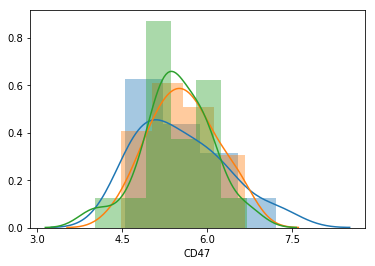

In [17]:
for cluster, samples in assign.groupby(1):
    print samples.index.values
    sns.distplot(exp.loc['CD47', samples.index.values], label=str(cluster))

In [18]:
pth = 'data/xCell_TARGET-osteosarcoma-2019-02-02_xCell_1553020819.txt'
xcell = pd.read_csv(pth, sep='\t', index_col=0)
xcell.columns = [x.replace('.', '-') for x in xcell.columns]

In [19]:
igroups = dict((group, []) for group in assign[1].unique())
data = pd.DataFrame(columns=['sample', 
                             'cluster', 
                             'source', 
                             'feature', 
                             'value'])

for sample in assign.index.values:
  
    assignment = assign.loc[sample, 1]
    
    if pd.isnull(assignment):
        continue
    
    igroups[assignment].append(sample)
        
    for cell, value in xcell[sample].iteritems():
        data.loc[len(data), :] = [sample, assignment, 'xCell', cell, value]
        
skip = ['P-value', 'Pearson Correlation', 'RMSE']

data = data[~data['feature'].isin(skip)]
        
data['value'] = pd.to_numeric(data['value'])

In [20]:
data

,sample,cluster,source,feature,value
0,TARGET-40-0A4HMC-01A-01R,1,xCell,Adipocytes,0.0000
1,TARGET-40-0A4HMC-01A-01R,1,xCell,Astrocytes,0.0000
2,TARGET-40-0A4HMC-01A-01R,1,xCell,B-cells,0.0000
3,TARGET-40-0A4HMC-01A-01R,1,xCell,Basophils,0.0990
4,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ T-cells,0.0000
5,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ Tcm,0.0095
6,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ Tem,0.0212
7,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ memory T-cells,0.0000
8,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ naive T-cells,0.0000
9,TARGET-40-0A4HMC-01A-01R,1,xCell,CD8+ T-cells,0.0000


In [21]:
from scipy.stats import kruskal, f_oneway
import collections
import scikit_posthocs as sp
import itertools

sigs = collections.defaultdict(list)

p_values = pd.DataFrame(columns=['source', 
                                 'feature', 
                                 'A', 
                                 'B', 
                                 'holm p-value'])

for source, rows in data.groupby('source'):
    
    print(source)
    print()
    nfeatures = len(rows['feature'].unique())
    alpha = 1 - (1 - 0.05) ** (1.0 / nfeatures)
    print(alpha)
    for feature in rows['feature'].unique():
        print(feature)
        groups3 = []
        for i, rows in data[data['feature'] == feature].groupby('cluster'):
            groups3.append(list(rows['value'].values))
    
        try:
            stat, pvalue = kruskal(*groups3)
            print(feature, pvalue, pvalue < alpha)
        
        except:
            continue
    
        if pvalue < alpha:
            sigs[source].append(feature)
            
            res = sp.posthoc_mannwhitney(groups3, 
                                         p_adjust='holm')
            
            print res
            
            for i, j in itertools.combinations(range(len(groups3)),
                                               2):
                
                if i == j:
                    continue 
                    
                p_values.loc[len(p_values), :] = [source,
                                                  feature,
                                                  i, 
                                                  j,
                                                  res.iloc[i, j]]

xCell
()
0.000765278582887
Adipocytes
('Adipocytes', 0.4762804325032105, False)
Astrocytes
('Astrocytes', 0.5244368336821338, False)
B-cells
('B-cells', 0.12524804407440862, False)
Basophils
('Basophils', 0.23716007898096386, False)
CD4+ T-cells
CD4+ Tcm
('CD4+ Tcm', 0.6477630084882293, False)
CD4+ Tem
('CD4+ Tem', 0.043007735950684856, False)
CD4+ memory T-cells
('CD4+ memory T-cells', 0.15661176281321695, False)
CD4+ naive T-cells
('CD4+ naive T-cells', 0.1900500995837656, False)
CD8+ T-cells
('CD8+ T-cells', 0.552783089233206, False)
CD8+ Tcm
('CD8+ Tcm', 0.3912041733619085, False)
CD8+ Tem
('CD8+ Tem', 0.47236655274097283, False)
CD8+ naive T-cells
('CD8+ naive T-cells', 0.8518787478018508, False)
CLP
('CLP', 0.15500494526796477, False)
CMP
('CMP', 0.2875389940079705, False)
Chondrocytes
('Chondrocytes', 0.004106596747880648, False)
Class-switched memory B-cells
('Class-switched memory B-cells', 0.8719783699321275, False)
DC
('DC', 2.3703233003723463e-05, True)
          1         

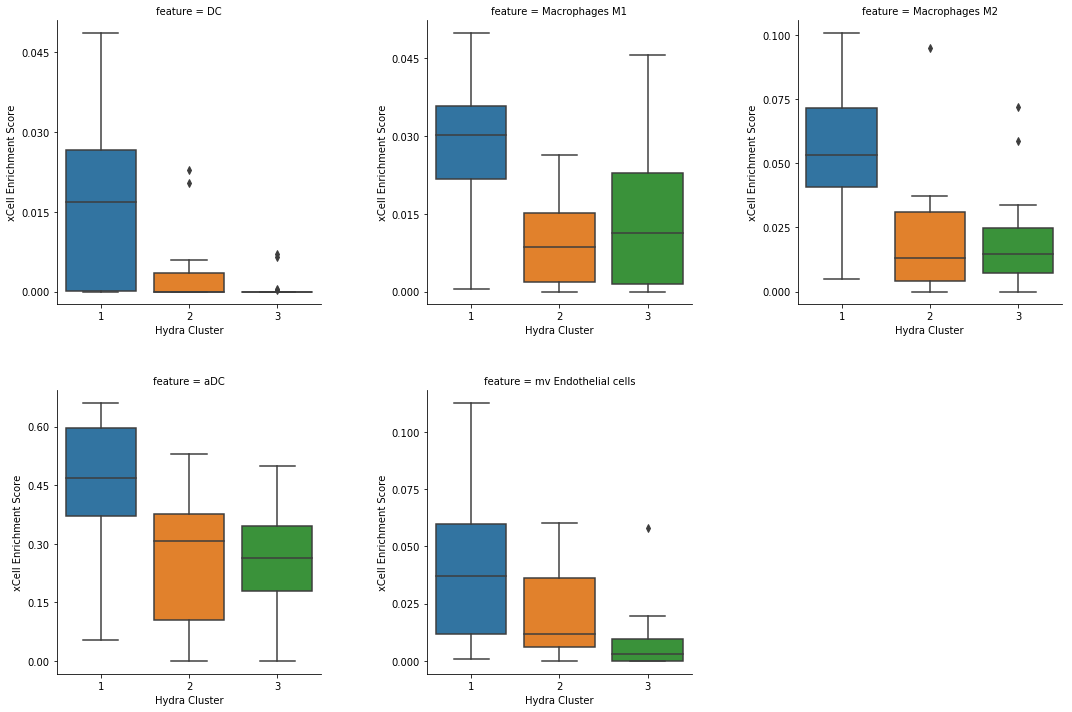

In [22]:
mask = (data['source'] == 'xCell') & (data['feature'].isin(sigs['xCell']))

t = data[mask]

g = sns.catplot(x='cluster', 
                y='value', 
                col='feature',
                kind='box',
                col_wrap=3,
                sharex=False,
                sharey=False,
                data=t)

for i in range(len(g.axes)):
    g.axes[i].set_xlabel('Hydra Cluster')
    g.axes[i].set_ylabel('xCell Enrichment Score')
    
plt.subplots_adjust(hspace=0.3, wspace=0.4)